## Завдання на лабораторну работу №1

В цій лабораторної роботі Вам буде запропоновано вирішити кілька завдань скориставшись засобами мови python. Рішення кожного завдання передбачає написання коду і демонстрація його працездатності на прикладах. За кожне вірно виконане завдання Ви отримуєте **1 бал**.

**Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.**

[зверніть увагу на типізацію функцій](https://docs.python.org/3/library/typing.html)

```NB```: При написанні коду не забувайте видаляти ```pass```!

**Don't cheat!**

Перед тим, як надіслати своє завдання на перевірку, вкажіть в назві файлу своє ім'я та прізвище!
Наприклад: ```task1_basic_ML&DS_anastasiya_deineko.ipynb```

Завдання 1: На вхід функція приймає рядок s. Функція повинна повернути True якщо рядок є паліндромом та False – в протилежному випадку.

Наприклад:

*   `is_palindrome(s='anade') -> False`
*   `is_palindrome(s='ana') -> True`




In [8]:
def is_palindrome(s: str) -> bool:
    s = s.lower()
    return s == s[::-1]

print(is_palindrome('Ana'))
print(is_palindrome('anade'))  

True
False


Завдання 2: Розв’язати квадратне рівняння $ax^2+bx + c = 0$.  Напишіть функцію,яка приймає параметри квадратного рівняння, а повертає одне рішення або декілька.

Наприклад:  


```
solve_quad(a=1, b=-2, c=1) -> 1  
solve_quad(a=1, b=0, c=-1) -> (-1, 1)  
solve_quad(a=0, b=2, c=-1) -> 0.5
```







In [9]:
import math

def solve_quad(a: float, b: float, c: float):
    discriminant = b**2 - 4*a*c
    if discriminant > 0:
        x1 = (-b + math.sqrt(discriminant)) / (2*a)
        x2 = (-b - math.sqrt(discriminant)) / (2*a)
        return x1, x2
    elif discriminant == 0:
        x = -b / (2*a)
        return x
    else:
        return "No real roots"

print(solve_quad(12, 4, -5))


(0.5, -0.8333333333333334)


Завдання 3: Реалізація функції merge. На вхід функція приймає 2 відсортованих масиви - `a` і `b`. Функція повинна повернути один відсортований масив, який містить всі елементи масивів `a` і `b`.

Наприклад: `merge([1, 3, 3, 5], [3, 5, 5, 7]) -> [1, 3, 3, 3, 5, 5, 5, 7]`

In [10]:
from typing import List

def merge(a: List[int], b: List[int]) -> List[int]:
    merged = []
    i = j = 0
    
    while i < len(a) and j < len(b):
        if a[i] <= b[j]:
            merged.append(a[i])
            i += 1
        else:
            merged.append(b[j])
            j += 1

    while i < len(a):
        merged.append(a[i])
        i += 1

    while j < len(b):
        merged.append(b[j])
        j += 1

    return merged

print(merge([1, 3, 3, 5], [3, 5, 5, 7]))  


[1, 3, 3, 3, 5, 5, 5, 7]


Завдання 4: Реалізація алгоритму [MergeSort](https://ru.wikipedia.org/wiki/%D0%A1%D0%BE%D1%80%D1%82%D0%B8%D1%80%D0%BE%D0%B2%D0%BA%D0%B0_%D1%81%D0%BB%D0%B8%D1%8F%D0%BD%D0%B8%D0%B5%D0%BC)..

Наприклад: `MergeSort([3, 1, 3, 5]) -> [1, 3, 3, 5]`

In [11]:
from typing import List

def merge_sort(L: List[int]) -> List[int]:
    if len(L) <= 1:
        return L

    mid = len(L) // 2
    left = merge_sort(L[:mid])
    right = merge_sort(L[mid:])

    return merge(left, right)

def merge(left: List[int], right: List[int]) -> List[int]:
    merged = []
    i = j = 0

    while i < len(left) and j < len(right):
        if left[i] <= right[j]:
            merged.append(left[i])
            i += 1
        else:
            merged.append(right[j])
            j += 1

    merged.extend(left[i:])
    merged.extend(right[j:])

    return merged

print(merge_sort([3, 1, 3, 5])) 


[1, 3, 3, 5]


## Знайомство з numpy.

Всі завдання з цієї частини передбачають написання функції на мові Python, а так само приклади роботи цієї функції. При реалізації завдань потрібно використовувати методи з бібліотеки `numpy`. Рішення з циклами будуть оцінені в 0 балів.

[базова документація](http://www.numpy.org)

```NB```: Під матрицею розуміється двовимірний [numpy.array](https://docs.scipy.org/doc/numpy/reference/generated/numpy.array.html)

Для підключення модуля скористайтеся наступним рядком.
Використовуйте стандартне скорочення np.

In [12]:
import numpy as np

Cтворення одномірного і двомірного масивів методами numpy:

In [13]:
Ar1d = np.array([1, 2, 3], dtype=np.float64)
print(Ar1d)

[1. 2. 3.]


In [14]:
Ar2d = np.array([[1, 2],
                [3, 4]], dtype=float)
print(Ar2d)

[[1. 2.]
 [3. 4.]]


Завдання 6: Написати функцію яка на вхід приймає 3 масиви – `X, Y, Z`. функція повертатиме `True` у випадку, коли вони рівні та `False` – якщо ні.

Рекомендація до завдання: Не використовуйте оператор `==`

In [15]:
def is_equal(X, Y, Z):
    if len(X) != len(Y) or len(X) != len(Z):
        return False
    
    for x, y, z in zip(X, Y, Z):
        if x != y or x != z:
            return False
    
    return True

print(is_equal([1,2,3], [1,2,3], [1,2,3]))  
print(is_equal([1,3,2], [1,2,3], [1,2,3])) 

True
False


Завдання 7: написати функцію, яка приймає на вході вектор рядок, а повертає вектор стовбець.

Рекомендація до завдання: Забороняється використовувати операцію транспонування! Скористайтесь методом `reshape`.

In [16]:
def rot_vec(x):
    return x.reshape(-1, 1)

vector_x = np.array([1, 2, 3, 4, 5, 6, 8, 9, 12, 41])

vector_y = rot_vec(vector_x)

print("Vector x:")
print(vector_x)
print("\nVector y:")
print(vector_y)


Vector x:
[ 1  2  3  4  5  6  8  9 12 41]

Vector y:
[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 8]
 [ 9]
 [12]
 [41]]


Завдання 8: Написати функцію яка приймає на вхід двовимірний масив, а повертає масив з діагональними елементами цієї матриці.

Наприклад: `[[1, 2], [3, 4]] -> [1 4]`

In [17]:
def get_diag(X):
    diag = [X[i][i] for i in range(min(len(X), len(X[0])))]    
    return diag

data_matrix_numpy = np.array([[1, 2], [3, 4]])

get_diag_matrix = get_diag(data_matrix_numpy)

print(get_diag_matrix)


[1, 4]


Завдання 9: Написати функцію яка приймає на вхід двомірний масив, а повертає масив елементів які знаходяться на другорядній діагоналі. Приклад: `[[1, 2], [3, 4]] -> [2 3]`

In [18]:
def sec_diag(X):
    size = min(len(X), len(X[0]))
    diag = [X[i][size - i - 1] for i in range(size)]
    return diag

data_matrix_numpy = np.array([[1, 2], [3, 4]])

get_diag_matrix = sec_diag(data_matrix_numpy)

print(get_diag_matrix)


[2, 3]


## Робота з бібліотекою pandas

В наступній частині лабораторної роботи розглянемо бібліотеку pandas.
Перед виконанням цієї частини необхідно завантажити датасет `titanic.csv`

[основна документація цього розділу](https://pandas.pydata.org/)

In [19]:
import pandas as pd

# Завантажте датасет. Ознайомтесь з тим як це правильно зробити, уважно прочитавши документацію по функції pd.read_csv.
# Зверніть особливу увагу на роздільники датасета.

dataset = pd.read_csv("titanic.csv")

Завдання 10: Кого більше - чоловіків чи жінок?

In [20]:
def who_more():
    dataset = pd.read_csv("titanic.csv")
    male, female = dataset['Sex'].value_counts()

    if male > female:
        return "Male", male
    elif female > male:
        return "Female", female
    else:
        return "Equal", male

gender, count = who_more()
print(f"There are more {gender}s with a count of {count}.")


There are more Males with a count of 577.


Завдання 11: Виведіть наступні характеристики пасажирів: середній вік пасажирів, середній вік чоловіків, середній вік жінок, максимальний і мінімальний вік серед чоловіків і жінок.

In [21]:
def mean_info_passanger():
    dataset = pd.read_csv("titanic.csv")

    age_and_sex = dataset[['Age', 'Sex']]

    mean_age_passanger = age_and_sex['Age'].mean()

    mean_age_male = age_and_sex[age_and_sex['Sex'] == 'male']['Age'].mean()

    mean_age_female = age_and_sex[age_and_sex['Sex'] == 'female']['Age'].mean()

    max_age_male = age_and_sex[age_and_sex['Sex'] == 'male']['Age'].max()

    min_age_male = age_and_sex[age_and_sex['Sex'] == 'male']['Age'].min()

    max_age_female = age_and_sex[age_and_sex['Sex'] == 'female']['Age'].max()

    min_age_female = age_and_sex[age_and_sex['Sex'] == 'female']['Age'].min()

    return mean_age_passanger, mean_age_male, mean_age_female, max_age_male, min_age_male, max_age_female, min_age_female

mean_age_passanger, mean_age_male, mean_age_female, max_age_male, min_age_male, max_age_female, min_age_female = mean_info_passanger()

print("Mean age all passanger:", mean_age_passanger)
print("Mean age male:", mean_age_male)
print("Mean age female:", mean_age_female)
print("Oldest male:", max_age_male)
print("Youngest male:", min_age_male)
print("Oldest female:", max_age_female)
print("Youngest female:", min_age_female)


Mean age all passanger: 29.69911764705882
Mean age male: 30.72664459161148
Mean age female: 27.915708812260537
Oldest male: 80.0
Youngest male: 0.42
Oldest female: 63.0
Youngest female: 0.75


 ## Знайомство з бібліотекою matplotlib

Для початку ознайомтесь з [документацією](https://matplotlib.org/)

Завдання 12: Для наведених та реалізованих графіків Вам нобхідно зробити розширення (додати підписи, легенду тощо):

$f_{1}(x) =  \frac{sin(x)}{x}$

$f_{2}(x) =  \frac{cos(x)}{x^2 + 1}$

$f_{3}(x) =  cos^2(x) - \frac{sin(x)}{2}$  

$f_{4}(x) =  cos(x)$  

$f_{5}(x) =  \frac{sin(x)}{x^2 + 1}$

In [22]:
from matplotlib import pylab as plt
%matplotlib inline

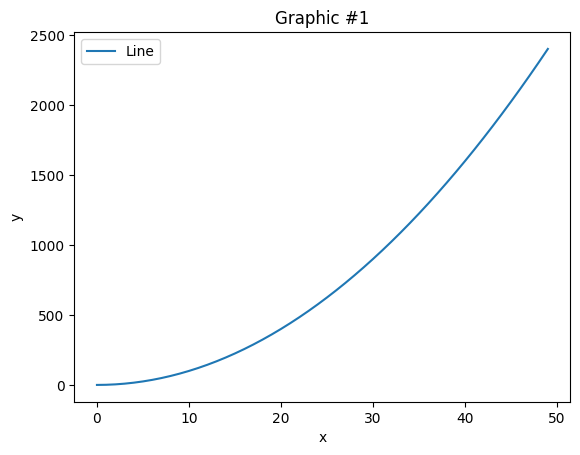

In [23]:
x = [i for i in range(50)]
y = [i**2 for i in range(50)]

fig, ax = plt.subplots()

ax.plot(x, y, label='Line')

ax.legend(loc="upper left")


ax.set_title("Graphic #1")
ax.set_xlabel("x")
ax.set_ylabel("y")

plt.show()


In [24]:
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(-10, 10, 0.01)

y1 = np.sin(x) / x
y2 = np.cos(x) / (1. + x ** 2)
y3 = np.cos(x) * np.cos(x) - np.sin(x) / 2.

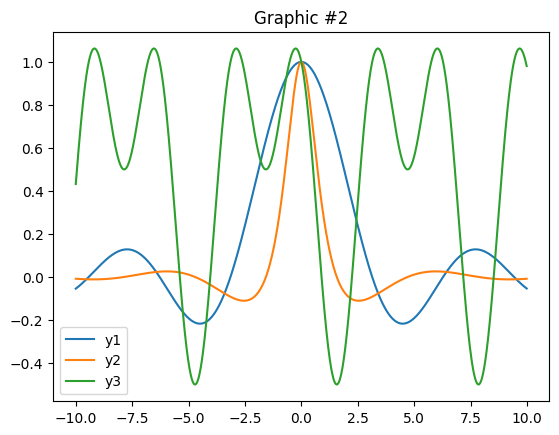

In [25]:
plt.plot(x, y1, label='y1') 
plt.plot(x, y2, label='y2')  
plt.plot(x, y3, label='y3')  

plt.legend()

plt.title('Graphic #2')

plt.show()


In [26]:
import matplotlib.pyplot as plt

x = np.arange(-10, 10, 0.01)

y4 = np.cos(x)
y5 = np.sin(x) / (1. + x ** 2)

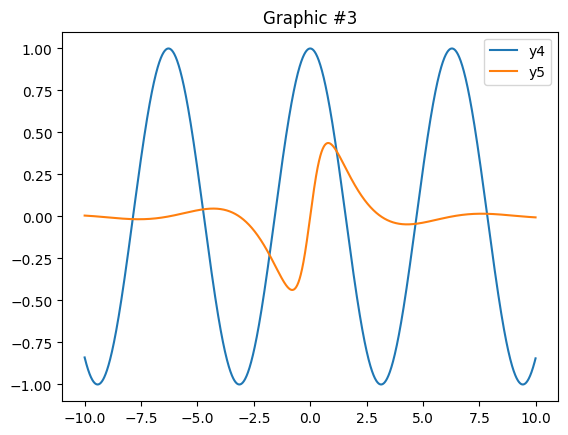

In [27]:
plt.plot(x,y4, label = 'y4')
plt.plot(x,y5, label = 'y5')
plt.title('Graphic #3')
plt.legend()
plt.show()


Завдання 13: Для побудованого ргафіку щільності розподілу випадкової змінної Вам необхідно зробити доповнення (підписи, легенда тощо).

In [28]:
d = np.random.normal(loc=2.0, scale=3.5, size=1000)

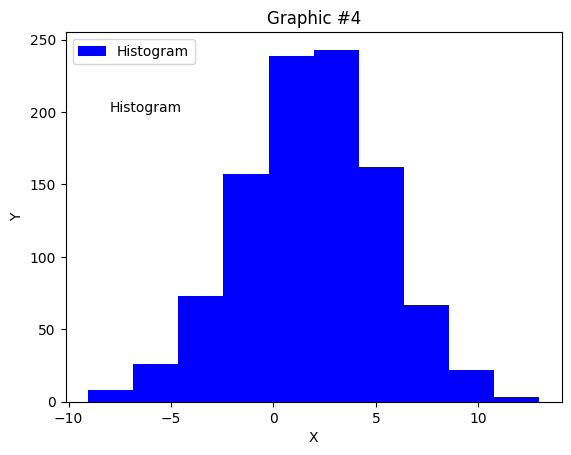

In [29]:
plt.hist(d, color='blue', label='Histogram')

plt.text(-8, 200, "Histogram") 

plt.legend(loc="upper left")

plt.title("Graphic #4")

plt.xlabel("X")
plt.ylabel("Y")

plt.show()


Кожне правильно виконане завдання оцінюється в `1 бал`.